# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from statsmodels.api import Logit

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

# Load dataset

In [5]:
backpain = pd.read_csv('../input/lower-back-pain-symptoms-dataset/Dataset_spine.csv')
backpain.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [6]:
backpain.drop('Unnamed: 13',axis=1,inplace=True)

In [7]:
column_name = ['pelvic_incidence',\
'pelvictilt',\
'lumbar_lordosis_angle',\
'sacral_slope',\
'pelvic_radius',\
'degree_spondylolisthesis',\
'pelvic_slope',\
'Direct_tilt',\
'thoracic_slope',\
'cervical_tilt',\
'sacrum_angle',\
'scoliosis_slope',\
'status'\
]

In [8]:
backpain.columns = column_name

In [9]:
backpain.head()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [10]:
backpain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvictilt                  310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
Direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
status                      310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


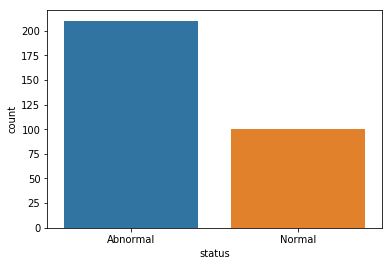

In [11]:
sns.countplot(backpain.status)

# Encode

In [12]:
backpain['status'] = backpain['status'].map({'Abnormal':1,'Normal':0})

# Check skewness

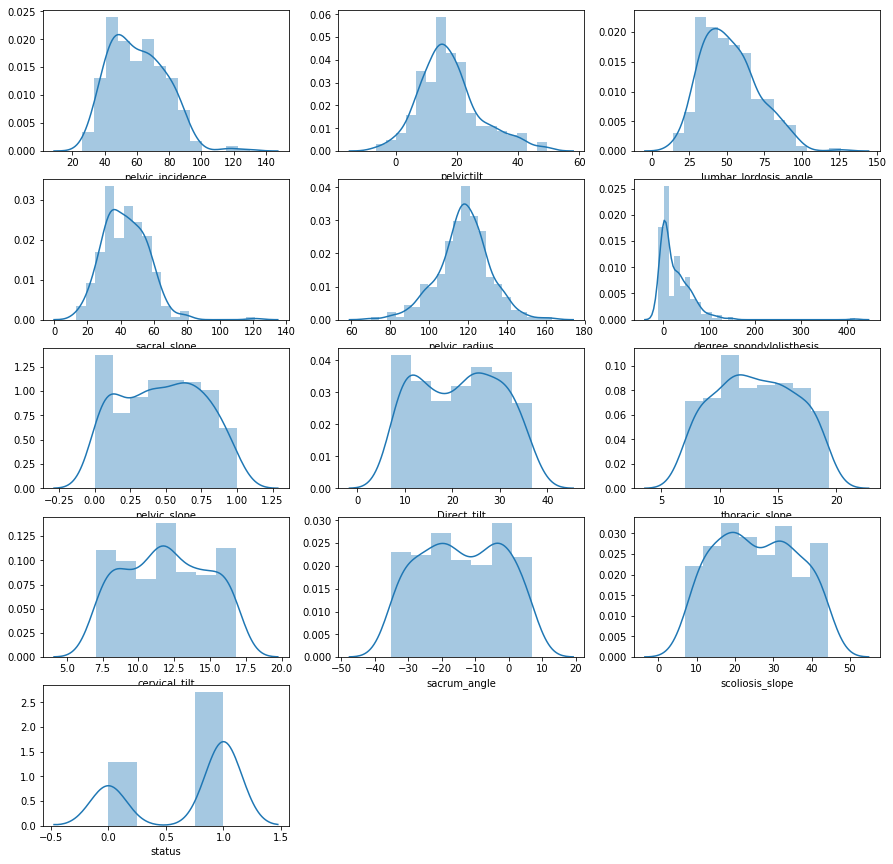

In [13]:
fig = plt.figure(figsize=(15,15))
for i in range(backpain.shape[1]):
    ax = fig.add_subplot(5,3,i+1)
    sns.distplot(backpain[backpain.columns[i]],ax=ax)

# Train test split

In [14]:
x = backpain.drop(['status','scoliosis_slope','lumbar_lordosis_angle','thoracic_slope','pelvic_incidence','sacrum_angle','pelvic_slope','Direct_tilt'],axis=1)
y = backpain.status

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state=1)

# Apply Classification Model 

In [16]:
lor = LogisticRegression()

In [17]:
lor.fit(xtrain,ytrain)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
ypred = lor.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1])

# Accuracy

In [19]:
cm = confusion_matrix(ytest,ypred)
cm

array([[23,  4],
       [ 6, 60]])

In [20]:
accuracy = accuracy_score(ytest,ypred)
accuracy

0.8924731182795699

# Feature Selection

## using correlarion

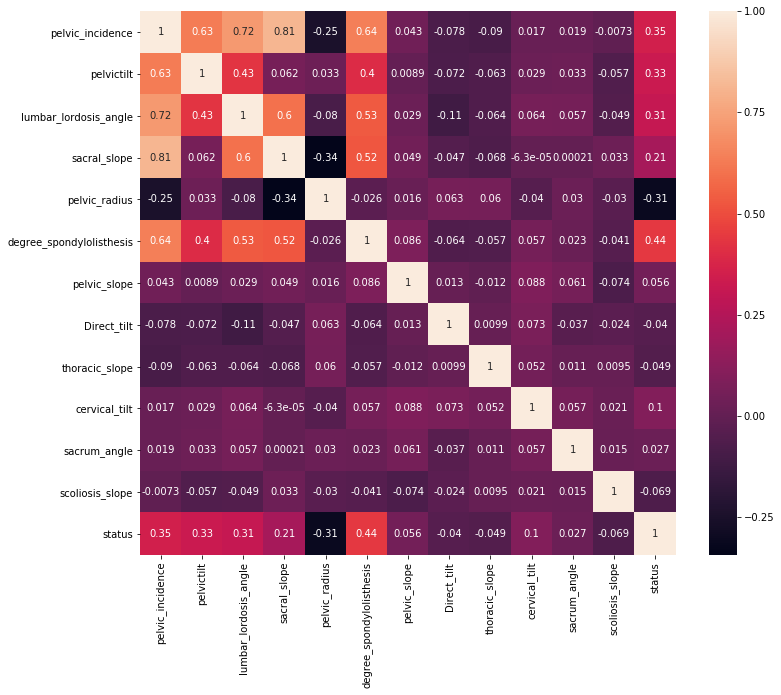

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(backpain.corr(),annot=True)

## forward selection

In [22]:
temp = backpain.drop(['scoliosis_slope','lumbar_lordosis_angle'],axis=1)

In [23]:
vif = [variance_inflation_factor(temp.values,i) for i in range(temp.shape[1])]

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [24]:
pd.DataFrame({'colums':temp.columns,'vif':vif})

,colums,vif
0,pelvic_incidence,inf
1,pelvictilt,inf
2,sacral_slope,inf
3,pelvic_radius,32.106400
4,degree_spondylolisthesis,2.559627
5,pelvic_slope,3.806209
6,Direct_tilt,7.174123
7,thoracic_slope,15.165143
8,cervical_tilt,17.124902
9,sacrum_angle,2.316379


## backward elimination

In [25]:
result = Logit(temp['status'],temp.drop(['status','thoracic_slope','pelvic_incidence','sacrum_angle','pelvic_slope','Direct_tilt'],axis=1)).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.330369
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  310
Model:                          Logit   Df Residuals:                      305
Method:                           MLE   Df Model:                            4
Date:                Tue, 10 Sep 2019   Pseudo R-squ.:                  0.4746
Time:                        07:07:39   Log-Likelihood:                -102.41
converged:                       True   LL-Null:                       -194.93
Covariance Type:            nonrobust   LLR p-value:                 6.207e-39
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
pelvictilt                   0.1086      0.027      4.096      0.000       0.057       0.160
sacral_slope                -0.0575      0.017     -3.432      0.001      -0.090      -0.025
pelvic_radius               -0.0174      0.007     -2.471      0.013      -0.031      -0.004
degree_spondylolisthesis     0.1498      0.021      7.084      0.000       0.108       0.191
cervical_tilt                0.1469      0.057      2.558      0.011       0.034       0.260
============================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Conclusion

In [26]:
conf = np.exp(result.conf_int())
conf['odds-ratio'] = round(result.params,2)
conf['pvalue'] = round(result.pvalues,3)
conf.rename({0:'ci_2.5%',1:'ci_97.5%'},inplace=True,axis=1)
conf

,ci_2.5%,ci_97.5%,odds-ratio,pvalue
pelvictilt,1.058242,1.174090,0.11,0.000
sacral_slope,0.913555,0.975621,-0.06,0.001
pelvic_radius,0.969263,0.996406,-0.02,0.013
degree_spondylolisthesis,1.114409,1.210702,0.15,0.000
cervical_tilt,1.034935,1.296311,0.15,0.011


    holding all other features constant ,odd of having backpain is:
    - 11% increase for every 1 unit increase in pelvictilt
    - 6% decrease for every 1 unit increase in sacral_slope
    - 2% decrease for every 1 unit increase in pelvic_radius
    - 15% increase for every 1 unit increase in degree_spondylolisthesis
    - 15% increase for every 1 unit increase in cervical_tilt

# Model statistics

In [27]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
misclassification = 1 - accuracy
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
print('accuracy, misclassification, sensitivity, specificity')
print(accuracy,misclassification,sensitivity,specificity)

accuracy, misclassification, sensitivity, specificity
0.8924731182795699 0.10752688172043012 0.9090909090909091 0.8518518518518519


In [28]:
positive_predicted_value = TP/float(TP+FP)
negative_predicted_value = TN/float(TN+FN)
print('positive_predicted_value, negative_predicted_value')
print(positive_predicted_value,negative_predicted_value)

positive_predicted_value, negative_predicted_value
0.9375 0.7931034482758621


In [29]:
positive_likelyhood_ratio = sensitivity/(1-specificity)
negative_likelyhood_ratio = (1-sensitivity)/specificity
print('positive_likelyhood_ratio, negative_likelyhood_ratio')
print(positive_likelyhood_ratio,negative_likelyhood_ratio)

positive_likelyhood_ratio, negative_likelyhood_ratio
6.136363636363637 0.10671936758893284


# ROC-AUC curve

Text(0, 0.5, 'True positive rate (Sensitivity)')

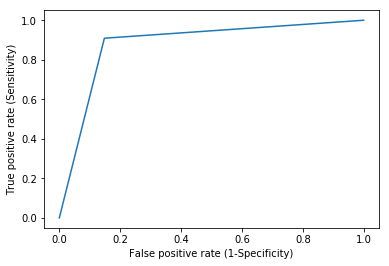

In [30]:
fpr,tpr,thresolds = roc_curve(ytest,ypred)
plt.plot(fpr,tpr)
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')


In [31]:
roc_auc_score(ytest,ypred)

0.8804713804713805